<h1 style = "font-family: garamond; font-size: 50px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >Movie Plot Summarizer</h1>
<h1 style = "font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >Training and Modeling</h1>

<h1 style = "font-family: garamond; font-size: 45px; font-style: normal; letter-spacing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >Table of Contents</h1>


* [1. Data Loading](#1)
* [2. Introduction](#2)
* [3. Extractive Summarization](#3)
    * [3.1 Spacy](#3.1)
    * [3.2 Gensim TextRank](#3.2)
    * [3.3 Sumy Luhn](#3.3)
* [4. Abstractive Summarization](#4)
    * [4.1 Walkthrough of Encoder-Decoder Seq2Seq model](#4.1)
    * [4.2 T5](#4.2)
    * [4.3 Bert](#4.3)
* [5. Results](#5)
    * [5.1 Subjective measures](#5.1)
    * [5.2 Objective measures](#5.2)
* [6. Summary](#6)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
import ast
import statistics

'''from rouge import Rouge

from keras.preprocessing.text import Tokenizer 
from nltk.corpus import stopwords   
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
import nltk
nltk.download('stopwords')

#for asbtract summarization
import gensim
from gensim.models import Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec
import scipy
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

# pd.set_option("display.max_colwidth", 200)
# warnings.filterwarnings("ignore")'''

'from rouge import Rouge\n\nfrom keras.preprocessing.text import Tokenizer \nfrom nltk.corpus import stopwords   \nfrom tensorflow.keras.models import Model\nfrom tensorflow.keras.callbacks import EarlyStopping\nimport warnings\nimport nltk\nnltk.download(\'stopwords\')\n\n#for asbtract summarization\nimport gensim\nfrom gensim.models import Word2Vec\nfrom gensim.scripts.glove2word2vec import glove2word2vec\nimport scipy\nimport torch\nfrom transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config\n\n# pd.set_option("display.max_colwidth", 200)\n# warnings.filterwarnings("ignore")'

<a id = '1'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Data Loading</h3>

In [2]:
df = pd.read_csv('../data/df_final.csv')

In [3]:
df

,Release Year,Title,Plot,Overview,cleaned_plot,cleaned_overview
0,1902,Jack and the Beanstalk,The earliest known adaptation of the classic f...,Abbott and Costello's version of the famous fa...,the earliest known adaptation of the classic f...,sostok _START_ abbott and costello version of ...
1,1905,The Night Before Christmas,Scenes are introduced using lines of the poem....,A cartoon based on the works of Nikolay Gogol....,scenes are introduced using lines of the poem ...,sostok _START_ a cartoon based on the works of...
2,1906,Dream of a Rarebit Fiend,The Rarebit Fiend gorges on Welsh rarebit at a...,Adapted from Winsor McCay's films and comics o...,the rarebit fiend gorges on welsh rarebit at r...,sostok _START_ adapted from winsor mccay films...
3,1908,A Christmas Carol,No prints of the first American film adaptatio...,Reginald Owen portrays Charles Dickens' holida...,no prints of the first american film adaptatio...,sostok _START_ reginald owen portrays charles ...
4,1910,Ramona,Ramona chronicles the romance between Ramona (...,Half-Indian girl brought up in a wealthy house...,ramona chronicles the romance between ramona m...,sostok _START_ half-indian girl brought up in ...
...,...,...,...,...,...,...
3022,2016,The Age of Shadows,A Korean police captain named Lee Jung-chool (...,Movie follows the activities of the Heroic Cor...,a korean police captain named lee jung-chool s...,sostok _START_ movie follows the activities of...
3023,2016,My Annoying Brother,National Judo athlete Doo-young (Do Kyung-soo)...,Doo-Sik (Jo Jung-suk) gets paroled from prison...,national judo athlete doo-young do kyung-soo d...,sostok _START_ doo-sik jo jung-suk gets parole...
3024,2017,Fabricated City,"In real life, Kwon Yoo (Ji Chang-wook) is unem...","In real life, Kwon Yoo is unemployed, but in t...",in real life kwon yoo ji chang-wook is unemplo...,sostok _START_ in real life kwon yoo is unempl...
3025,2017,New Trial,The film tells the story of a man whose life w...,"A taxi driver is found dead, and Hyun-woo, the...",the film tells the story of man whose life was...,sostok _START_ a taxi driver is found dead and...


Youtube video on extractive summarization

- Text cleaning
- Sentence Tokenization
- Word Tokenization
- Word-frequency table
- Summarization

<a id = '2'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Introduction to Text Summarization</h3>

- Text summarization is the method of extracting summaries from original text without losing any vital information. It has many applications and, much like NLP in general, has seen much improvement over the past few years. In this notebook, we will use our cleaned movie dataset to explore the more common approaches to text summarization and compare which is best. We will use some objective criteria like cosine similarity scores and rouge scores to compare the various methods, but at the time of this writing, nothing evaluates the results of summarization better than humans. Thus, we cannot avoid invoking our own subjective and flawed evaluations.

- The first thing to know is that text summarization methods can be grouped into two categories: Extractive and Abstractive methods.
- Extractive summarization seeks to identify the most significant sentences of the text and use them to create a summary. Thus, the summary contains the exact sentences from the original text.
- Abstractive summarization seeks to identify the important sections and interpret the context in order to generate sentences for the summary. This method is far more advanced and has much more room for improvement over extractive methods. 

<a id = '3'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Extractive Models</h3>

To save time we are going to use a selection of 10 movies to compare the generated summaries from

In [43]:
df_10 = df.loc[(df['Overview'].str.split().str.len() <= 30) & (df['Release Year'] >= 1980)].sample(n=10)
df_10 = df_10.reset_index(drop=True)
df_10

,Release Year,Title,Plot,Overview,cleaned_plot,cleaned_overview
0,1998,Get Real,Steven Carter (Ben Silverstone) is a 16-year-o...,A tenderly romantic coming-of-age story as two...,steven carter ben silverstone is 16-year-old m...,sostok _START_ a tenderly romantic coming-of-a...
1,1999,A Walk on the Moon,Pearl Kantrowitz (Diane Lane) and her husband ...,The world of a young housewife is turned upsid...,pearl kantrowitz diane lane and her husband ma...,sostok _START_ the world of young housewife is...
2,1988,The Good Mother,"Anna Dunlap (Keaton), is a piano teacher who w...","After finding a sexually liberated boyfriend, ...",anna dunlap keaton is piano teacher who works ...,sostok _START_ after finding sexually liberate...
3,1997,Henry Fool,Socially inept garbage-man Simon Grim is befri...,An egocentric bum transforms the lives of a sh...,socially inept garbage-man simon grim is befri...,sostok _START_ an egocentric bum transforms th...
4,2001,Crazy/Beautiful,"Nicole Oakley, the out-of-control daughter of ...","At Pacific Palisades High, a poor Latino falls...",nicole oakley the out-of-control daughter of c...,sostok _START_ at pacific palisades high poor ...
5,2007,The Savages,After drifting apart emotionally over the year...,A sister and brother face the realities of fam...,after drifting apart emotionally over the year...,sostok _START_ a sister and brother face the r...
6,1990,"After Dark, My Sweet","Ex-boxer Kevin ""Kid"" Collins is a drifter and ...",The intriguing relationship between three desp...,ex-boxer kevin kid collins is drifter and an e...,sostok _START_ the intriguing relationship bet...
7,2012,Broken,Eleven-year-old diabetic Emily 'Skunk' Cunning...,"After dating a wonderful man, Hope comes back ...",eleven-year-old diabetic emily skunk cunningha...,sostok _START_ after dating wonderful man hope...
8,2016,Mental,An underworld mafia steals valuable mineral re...,"A charismatic, crazy hothead transforms a fami...",an underworld mafia steals valuable mineral re...,sostok _START_ a charismatic crazy hothead tra...
9,1989,She's Out of Control,Widower Doug Simpson (Danza) is a radio manage...,A Los Angeles radio-station manager's girlfrie...,widower doug simpson danza is radio manager fr...,sostok _START_ a los angeles radio-station man...


<a id = '3.1'></a>
<h3 style = "font-family:garamond; font-size:30px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">SpaCy</h3>

spaCy is a free, open-source natural language processing library. It provide a fast and accurate snyntactic analysis, named entity recognition and ready access to word vectors. It also offers tokenization, sentence boundary detection, POS tagging, snytactic parsing, integrated word vectors, and alignment into the original string with high accuracy. 

Import the modules

In [53]:
'''!python -m spacy download en_core_web_sm'''
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from collections import Counter
from heapq import nlargest

Load the English model into spaCy

In [54]:
nlp = spacy.load('en_core_web_sm')

Since these extractive models are not learning from the whole dataset, let's select 10 random movies to use for comparision of models. 

We will come back to our 10 movies. For now we will demonstrate this process on 1 random film

In [58]:
single_samp = df.sample()
single_samp

,Release Year,Title,Plot,Overview,cleaned_plot,cleaned_overview
1830,1997,The Brave,The film concerns a Native American man named ...,A down-on-his-luck American Indian recently re...,the film concerns native american man named ra...,sostok _START_ a down-on-his-luck american ind...


We take the plot only and pass the string into the nlp function

In [59]:
doc = single_samp['Plot']
doc = doc.reset_index()
doc = doc.iloc[0]['Plot']
doc = nlp(doc)

Filtering Tokens: We need to create 2 lists for parts-of-speech and stop words to validate each token followed by filtering of the necessary tokens and saving them in the keywords list. 

In [60]:
keyword = []
stopwords = list(STOP_WORDS)
pos_tag = ['PROPN', 'ADJ', 'NOUN', 'VERB']
for token in doc:
    if(token.text in stopwords or token.text in punctuation):
        continue
    if(token.pos_ in pos_tag):
        keyword.append(token.text)

Next lets calculate the frequency of each token

In [61]:
freq_word = Counter(keyword)

Normalization of the list

In [62]:
max_freq = Counter(keyword).most_common(1)[0][1]
for word in freq_word.keys():  
    freq_word[word] = (freq_word[word]/max_freq)

We can see what this list should look like

In [63]:
freq_word.most_common(5)

[('Raphael', 1.0),
 ('film', 0.75),
 ('wife', 0.5),
 ('children', 0.5),
 ('family', 0.5)]

Weighing sentences: Each sentence will be weighed based on the frequency of the token present in each sentence. sent_strength is a python dictionary where the keys are the sentences and the string doc and the values are the weight of each sentence.

In [64]:
sent_strength={}
for sent in doc.sents:
    for word in sent:
        if word.text in freq_word.keys():
            if sent in sent_strength.keys():
                sent_strength[sent]+=freq_word[word.text]
            else:
                sent_strength[sent]=freq_word[word.text]

We can see what this looks like

In [65]:
sent_strength

{The film concerns a Native American man named Raphael who lives with his wife and two children in a remote community near a rubbish dump selling whatever he can to make a living.: 5.75,
 Raphael, seeing the hopelessness of his situation and his inability to provide for his family, agrees to star in a snuff film for a large sum of money that he hopes will give his family a chance for a better life.: 7.0,
 
 Having been given the money in advance, Raphael is given a week to live and then return to be tortured and killed in front of the camera.: 4.75,
 The film follows Raphael's transformation with his relationship with his wife and children over the course of his final week of life and his own personal anguish with his fate.: 5.75}

Lastly, nlargest is used to summarize the string with 3 arguments: number of sentences to extract (we will do 5 sentences here); the list/tuple/dictionary to iterate over; the condition that needs to be satisfied. The resulting summarized_sentences is a list of sentences of spaCy.span type, which will be converted to a string. 

In [66]:
summarized_sentences = nlargest(8, sent_strength, key=sent_strength.get)
final_sentences = [ w.text for w in summarized_sentences ]
summary = ' '.join(final_sentences)
print(summary)

Raphael, seeing the hopelessness of his situation and his inability to provide for his family, agrees to star in a snuff film for a large sum of money that he hopes will give his family a chance for a better life. The film concerns a Native American man named Raphael who lives with his wife and two children in a remote community near a rubbish dump selling whatever he can to make a living. The film follows Raphael's transformation with his relationship with his wife and children over the course of his final week of life and his own personal anguish with his fate. 
Having been given the money in advance, Raphael is given a week to live and then return to be tortured and killed in front of the camera.


Now, back to our 10 random movies to use for comparison. Let's take everything we just did and make it into a function that we can use in a for loop for our 10 random movies dataframe.

In [67]:
def spacy_extract(df_plot):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(df_plot)
    keyword = []
    stopwords = list(STOP_WORDS)
    pos_tag = ['PROPN', 'ADJ', 'NOUN', 'VERB']
    for token in doc:
        if(token.text in stopwords or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            keyword.append(token.text)
    freq_word = Counter(keyword)
    max_freq = Counter(keyword).most_common(1)[0][1]
    for word in freq_word.keys():  
        freq_word[word] = (freq_word[word]/max_freq)
    sent_strength={}
    for sent in doc.sents:
        for word in sent:
            if word.text in freq_word.keys():
                if sent in sent_strength.keys():
                    sent_strength[sent]+=freq_word[word.text]
                else:
                    sent_strength[sent]=freq_word[word.text]
    summarized_sentences = nlargest(3, sent_strength, key=sent_strength.get)
    final_sentences = [ w.text for w in summarized_sentences ]
    summary = ' '.join(final_sentences)
    return summary

In [68]:
spacy_generated_overview = []
for i in df_10['Plot']:
    spacy_generated_overview.append(spacy_extract(i))

In [69]:
for i in spacy_generated_overview:
    print('Generated Overview: ', i, '\n')

Generated Overview:  
Word around the school spreads about someone being gay in the school, and John fears that Steven has been telling people. He is surprised to find the school jock, John Dixon (Brad Gorton) also cruising, but John denies that he is gay. 
At a school dance, Steven gains a friend after he comforts Jessica (Stacy Hart), after an argument with a boyfriend, who is also his bully, Kevin (Tim Harris). 

Generated Overview:  The movie begins with the couple and their family including their teenage daughter Alison (Anna Paquin) and young son Danny (Bobby Boriello) and Marty's mother Lillian (Tovah Feldshuh) going to their summer camp retreat, Dr. Fogler's Bungalows, which they attend each summer. Pearl Kantrowitz (Diane Lane) and her husband Marty (Liev Schreiber) are a lower middle class Jewish couple in New York City, where Marty is a television repairman. The final scene shows Pearl and Marty dancing together, first to Dean Martin's "When You're Smiling" and then to Jimi 

<a id = '3.2'></a>
<h3 style = "font-family:garamond; font-size:30px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Gensim TextRank</h3>

Gensim has a summarization process based on TextRank Algorithm. TextRank algorithm is based on the concept that words that occur more frequently are significant, and thus the sentences containing these more frequent words are more important. TextRank algorithm assignes a score to each sentences and the top ranked sentences are used in the summary. Among the extractive methods, TextRank from Gensim seems to be the best currently.

In [42]:
import gensim
from gensim.summarization import summarize

ModuleNotFoundError: No module named 'gensim.summarization'

Gensim's TextRank is much easier to use. We have the optional parameters of ratio (of summarized to original text, represent from 0-1) and word_count (the number of words to use in the summary). We can only use one, so we will use ratio set at .2 (20%)

In [50]:
single_samp_plot = single_samp.reset_index()
single_samp_plot = single_samp.iloc[0]['Plot']

In [ ]:
short_sum = summarize(single_samp, ratio=0.2)
print(short_sum)

In [ ]:
gensim_generated_overview = []
for i in df_10['Plot']:
    gensim_generated_overview.append(summarize(i, ratio=0.2))

In [ ]:
for i in gensim_generated_overview:
    print('Generated Overview: ', i, '\n')

<a id = '3.3'></a>
<h3 style = "font-family:garamond; font-size:30px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">From sumy, Luhn</h3>

This is useful when both low frequency words and high frequency words are not significant. (based on TF-IDF)

In [70]:
'''!pip install sumy'''

'!pip install sumy'

In [71]:
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser

We have to initialize the parser

In [72]:
parser=PlaintextParser.from_string(single_samp,Tokenizer('english'))

instantiate the summarizer with the text document and choose the number of sentences

In [73]:
luhn_summarizer=LuhnSummarizer()
luhn_summary=luhn_summarizer(parser.document,sentences_count=6)

In [74]:
print(luhn_summary)

(<Sentence: Release Year      Title  \ 1830          1997  The Brave>, <Sentence: Plot  \ 1830  The film concerns a Native American man named ...>, <Sentence: Overview  \ 1830  A down-on-his-luck American Indian recently re...>, <Sentence: cleaned_plot  \ 1830  the film concerns native american man named ra...>, <Sentence: cleaned_overview 1830  sostok _START_ a down-on-his-luck american ind...>)


Now let's run this on our 10 movies

In [75]:
sumy_luhn_generated_overview = []
for i in df_10['Plot']:
    parser=PlaintextParser.from_string(i, Tokenizer('english'))
    luhn_summarizer = LuhnSummarizer()
    luhn_summary = luhn_summarizer(parser.document, sentences_count=6)
    gen_sum = ''
    for sen in luhn_summary:
        gen_sum = gen_sum + str(sen) + ' '
    sumy_luhn_generated_overview.append(gen_sum)

In [76]:
for i in sumy_luhn_generated_overview:
    print('Generated Overview: ', i, '\n')

Generated Overview:  He is surprised to find the school jock, John Dixon (Brad Gorton) also cruising, but John denies that he is gay. At a school dance, Steven gains a friend after he comforts Jessica (Stacy Hart), after an argument with a boyfriend, who is also his bully, Kevin (Tim Harris). Word around the school spreads about someone being gay in the school, and John fears that Steven has been telling people. In order to maintain his status in the school, John beats up Steven in front of his friends. Steven announces in front of assembly that he is gay, and looks to John for support, but he does not. In the end, John apologizes for beating him up and says he loves him, but as he is too afraid to come out, Steven breaks up with him, wishing him happiness.  

Generated Overview:  Meanwhile, Alison is neglected and she experiences her first period, her first date, and her first kiss as she enters a relationship with another boy at the camp, Ross Epstein. Marty's mother Lillian learns o

<a id = '4'></a>
<h3 style = "font-family:garamond; font-size:35px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Abstractive Summarization</h3>

<a id = '4.1'></a>
<h3 style = "font-family:garamond; font-size:30px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">Walkthrough of building Encoder-Decoder Seq2Seq recurrent neural network (RNN)</h3>

# Introduction

 - RNNs usually have fixed size input and output vectors. This is obviously quite undesirable for machine translation. Seq2Seq models can help us solve this problem. How? Because the fixed size output vector generated by the encoder need not be the same size as the input vector give to the decoder. It can be passed in whole or can be connected ot the hidden units of the decoder unit at every time step. 
 - For text summarization, our model will have an encoder that accepts the pre-processed Plot and Overview, trains the model to create an encoded representation, and sends it to a decoder which decodes the endcoded representation into a reliable summary. With more and more training, the model can be used to perform inference on new texts to generate new summaries. 

# Text summarization is a rapidly advancing area of NLP. With our cleaned dataset, we are going to explore some of the most common strategies of text summarization available and compare how they perform on our dataset, using both objective and subjective methods of comparison. This will be a practical guide on text summarization strategies.

In [96]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(
    np.array(df["cleaned_plot"]),
    np.array(df["cleaned_overview"]),
    test_size=0.1,
    random_state=0,
    shuffle=True,
)

In [97]:
# Tokenize the text to get the vocab count 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare a tokenizer on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

COULD TRY THE OTHER ONE HERE

In [98]:
thresh = 5

cnt = 0
tot_cnt = 0

for key, value in x_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary: ", (cnt / tot_cnt) * 100)

% of rare words in vocabulary:  68.75295006136128


In [99]:
max_plot_len = 375
max_overview_len = 55

In [100]:
# Prepare a tokenizer, again -- by not considering the rare words
x_tokenizer = Tokenizer(num_words = tot_cnt - cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

# Convert text sequences to integer sequences 
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

# Pad zero upto maximum length
x_tr = pad_sequences(x_tr_seq,  maxlen=max_plot_len, padding='post')
x_val = pad_sequences(x_val_seq, maxlen=max_plot_len, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 9931


In [101]:
# Prepare a tokenizer on testing data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

thresh = 5

cnt = 0
tot_cnt = 0

for key, value in y_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary:",(cnt / tot_cnt) * 100)

# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

# Convert text sequences to integer sequences 
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq = y_tokenizer.texts_to_sequences(y_val) 

# Pad zero upto maximum length
y_tr = pad_sequences(y_tr_seq, maxlen=max_overview_len, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_overview_len, padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))

% of rare words in vocabulary: 81.22323664862245
Size of vocabulary in Y = 2325


In [102]:
# Remove empty Summaries, .i.e, which only have 'START' and 'END' tokens
ind = []

for i in range(len(y_tr)):
    cnt = 0
    for j in y_tr[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_tr = np.delete(y_tr, ind, axis=0)
x_tr = np.delete(x_tr, ind, axis=0)

In [103]:
# Remove empty Summaries, .i.e, which only have 'START' and 'END' tokens
ind = []
for i in range(len(y_val)):
    cnt = 0
    for j in y_val[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_val = np.delete(y_val, ind, axis=0)
x_val = np.delete(x_val, ind, axis=0)

In [104]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, \
    Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [105]:
latent_dim = 300
embedding_dim = 200

# Encoder
encoder_inputs = Input(shape=(max_plot_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim,
                    trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output2, state_h2, state_c2) = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True,
                     return_sequences=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm3(encoder_output2)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True,
                    return_state=True, dropout=0.4,
                    recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = \
    decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 375)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 375, 200)     1986200     ['input_6[0][0]']                
                                                                                                  
 lstm_4 (LSTM)                  [(None, 375, 300),   601200      ['embedding_2[0][0]']            
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                            

We will impliment an early stopping mechanism to avoid overfitting

In [107]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [106]:
history = model.fit(
    [x_tr, y_tr[:, :-1]],
    y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
    epochs=30,
    callbacks=[es],
    batch_size=64,
    validation_data=([x_val, y_val[:, :-1]],
                     y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:
                     , 1:]),
    )

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

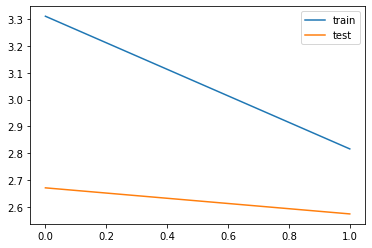

In [89]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [90]:
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [91]:
# Inference Models

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                      state_h, state_c])

# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim, ))
decoder_state_input_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_plot_len, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
        initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input_h, decoder_state_input_c],
                      [decoder_outputs2] + [state_h2, state_c2])

In [92]:
def decode_sequence(input_seq):

    # Encode the input as state vectors.
    (e_out, e_h, e_c) = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h, c) = decoder_model.predict([target_seq]
                + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != 'eostok':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word.
        if sampled_token == 'eostok' or len(decoded_sentence.split()) \
            >= max_overview_len - 1:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        (e_h, e_c) = (h, c)

    return decoded_sentence

In [93]:
# To convert sequence to summary
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0 and i != target_word_index['sostok'] and i \
            != target_word_index['eostok']:
            newString = newString + reverse_target_word_index[i] + ' '

    return newString

In [94]:
# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

In [95]:
for i in range(0, 4):
    print ('Review:', seq2text(x_tr[i]))
    print ('Original summary:', seq2summary(y_tr[i]))
    print ('Predicted summary:', decode_sequence(x_tr[i].reshape(1,
           max_plot_len)))
    print ('\n')

Review: after coming off successful comedy tour dolemite throws get together at his mansion the party is crashed by racist police officers and they find out that the sheriff wife is offering dolemite money for sexual services when the sheriff catches them red handed he shoots and kills his wife dolemite and his friends kidnap young man and decide to head to california to meet queen bee there they find out that the local mob boss joe kidnapped two of queen bee girls forcing her to close her business and work for him dolemite rescues queen bee her girls and teaches his enemies lesson all while being chased by the sheriff who has the murder of his own wife on dolemite 
Original summary: start comes to the rescue of queen whose nightclub is threatened by the mafia end 
Predicted summary:  start a the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 

# Either add an attention layer or discuss it

Previously, we were using an encoder-decoder architecture for machine translation, where one RNN reads in a sentence and a different one outputs a sentence. But we know that the Bleu score comes down ater 30 or 40 word sentences.  The attention model helps this problem greatly. It works by ********************

Now that we have seen how to put together a very simple neural network for a text summarization task, let's see how the current best models perform

<a id = '4.2'></a>
<h3 style = "font-family:garamond; font-size:30px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">T5 pre-trained</h3>

In [42]:
!pip install transformers==2.9.0 
!pip install pytorch_lightning==0.7.5

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build tokenizers


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\rotzn\anaconda3\python.exe' 'C:\Users\rotzn\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\rotzn\AppData\Local\Temp\tmpig94a7nl'
       cwd: C:\Users\rotzn\AppData\Local\Temp\pip-install-40n58drx\tokenizers_0df8d5b66aef497a9b74b2c08523f732
  Complete output (46 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creating build\lib.win-amd64-3.9\tokenizers
  copying tokenizers\__init__.py -> build\lib.win-amd64-3.9\tokenizers
  creating build\lib.win-amd64-3.9\tokenizers\models
  copying tokenizers\models\__init__.py -> build\lib.win-amd64-3.9\tokenizers\models
  creating build\lib.win-amd64-3.9\tokenizers\decoders
  copying tokenizers\decoders\__init__.py -> build\lib.win-amd64-3.9\tokenizers\decoders
  creating build\lib.win-amd64-3.9\tokenizers\normalizers
  copying tokenizers\normalizers\__init__.py

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [44]:
import torch
import json 
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

In [46]:
model = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')

In [51]:
processed_text = single_samp_plot.strip().replace("\n","")

In [52]:
tokenized_text = tokenizer.encode(processed_text, return_tensor="pt").to(device)

AttributeError: 'NoneType' object has no attribute 'encode'

In [ ]:
summary_ids = model.generate(tokenized_text,
                                    num_beams=4,
                                    no_repeat_ngram_size=2,
                                    min_length=30,
                                    max_length=100,
                                    early_stopping=True)

In [ ]:
output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [ ]:
print ("\n\nSummarized text: \n",output)

In [45]:
T5_generated_overview = []
device = torch.device('cpu')
for i in df_10.Plot:
    try:
        t5_prepared_Text = "summarize: "+ i
        tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt").to(device)
        summary_ids = model.generate(tokenized_text,
                                    num_beams=4,
                                    no_repeat_ngram_size=2,
                                    min_length=40,
                                    max_length=400,
                                    early_stopping=True)

        output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        T5_generated_overview.append(output)
    except:
        pass

AttributeError: 'NoneType' object has no attribute 'encode'

In [44]:
T5_generated_overview

[]

In [ ]:
df_80s["generated_overview"] = generated_overview
df_80s.head()

THIS IS HOW TO GET THE COSINE DISTANCE

In [ ]:
df_80s["overview_tokens"] = df_80s["Overview"].apply(lambda x: x.split(" "))
df_80s["generated_overview_tokens"] = df_80s["generated_overview"].apply(lambda x: x.split(" "))
df_80s.head()

In [ ]:
df_80s["cos_sim"] = df_80s.apply(lambda x: cosine_distance_wordembedding_method(x.generated_overview_tokens, x.overview_tokens), axis=1)
df_80s.head()

In [ ]:
df_80s["cos_sim"].mean()

In [ ]:
print(df_80s.iloc[0]["Overview"],"\n\n", df_80s.iloc[0]["generated_overview"])

In [ ]:
print(df_80s.iloc[1]["Overview"],"\n\n", df_80s.iloc[1]["generated_overview"])

In [ ]:
print(df_80s.iloc[2]["Overview"],"\n\n", df_80s.iloc[2]["generated_overview"])

In [ ]:
df_80s = df_80s[['Release Year', 'Title', 'Plot', 'Overview', 'cleaned_plot', 'cleaned_overview', 'overview_tokes', 'generated_overview', 'cos_sim']]
df_80s = df_80s.rename(columns={'generated_overview': 'Abs_generated_overview', 'cos_sim': 'Abs_cos_sim'})
df_80s.head()

<a id = '4.3'></a>
<h3 style = "font-family:garamond; font-size:30px; background-color: white; color : royalblue; border-radius: 100px 100px; text-align:left">BERT (pre-trained)</h3>

Due to hardware constraints, we will just be using the pre-trained

In [53]:
from transformers import pipeline
import os

'''os.environ["CUDA_VISIBLE_DEVICES"] = "0"'''

'os.environ["CUDA_VISIBLE_DEVICES"] = "0"'

In [54]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


We shall use single_sample_plot again

In [58]:
summary_text = summarizer(single_samp_plot, max_length=120, min_length=15, do_sample=False)[0]['summary_text']

In [60]:
print("\n\nPytorch Bart Overview: ", summary_text)



Pytorch Bart Overview:   In 1944, American forces were closing in on the Japanese-occupied Philippines . The Japanese held around 500 American prisoners who had survived the Bataan Death March in a notorious POW camp at Cabanatuan . The film chronicles the efforts of the Rangers, Alamo Scouts from the Sixth Army and Filipino guerrillas .


In [61]:
bart_generated_overview = []
for i in df_10['Plot']:
    summarizer = pipeline('summarization')
    summary_text = summarizer(i, max_length=120, min_length=15, do_sample=False)[0]['summary_text']
    bart_generated_overview.append(summary_text)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)
Your max_length is set to 120, but you input_length is only 115. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)

<a id = '5'></a>
<h1 style = "font-family: garamond; font-size: 35px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:left " >Results</h1>

<a id = '5.1'></a>
<h1 style = "font-family: garamond; font-size: 30px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:left " >Subjective measures</h1>

In [65]:
print('Title: ', df_10.iloc[0]['Title'],
      '\n\nLegit Overview: ',  df_10.iloc[0]["Overview"],
      "\n\nspacy Overview: ", spacy_generated_overview[0],
      "\n\ngensim overview: ", 'nothing yet', #gensim_generated_overview
      "\n\nluhn overview: ", sumy_luhn_generated_overview[0],
      "\n\nLSTM overview: ", 'nothing yet', #LSTM_generated_overview
      "\n\nT5 overview: ", 'nothing yet', #T5_generated_overview
      "\n\nbart overview: ", bart_generated_overview[0]
     )


Title:  Let Him Have It 

Legit Overview:  In 1950s England, slow-witted Derek Bentley falls in with a group of petty criminals led by Chris Craig, a teenager with a fondness for American gangster films. Chris and Derek's friendship leads to their involvement in the true case which would forever shake England's belief in capital punishment. 

spacy Overview:  Derek Bentley (Eccleston) is an illiterate, epileptic young adult with developmental disabilities who falls into a gang led by a younger teenager named Christopher Craig (Reynolds). Meanwhile, Bentley is sentenced to death under the English common law principle of joint enterprise, on the basis that his statement to Craig was an instigation to begin shooting. Bentley, who by this time has already been arrested, shouts "Let him have it, Chris" – whether he means the phrase literally ("Let him have the gun") or figuratively ("Open fire!") is unclear. 

gensim overview:  nothing yet 

luhn overview:  During the course of the robbery 

In [ ]:
print('Title: ', df_10.iloc[1]['Title'],
      '\n\nLegit Overview: ',  df_10.iloc[1]["Overview"],
      "\n\nspacy Overview: ", spacy_generated_overview[1],
      "\n\ngensim overview: ", 'nothing yet', #gensim_generated_overview
      "\n\nluhn overview: ", sumy_luhn_generated_overview[1],
      "\n\nLSTM overview: ", 'nothing yet', #LSTM_generated_overview
      "\n\nT5 overview: ", 'nothing yet', #T5_generated_overview
      "\n\nbart overview: ", bart_generated_overview[1]
     )


<a id = '5.2'></a>
<h1 style = "font-family: garamond; font-size: 35px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:left " >Objective measures</h1>

In [ ]:
path = "../global_vectors_for_word_rep/glove.6B.200d.txt"
final = glove2word2vec(path ,"./glove.6B.200d.txt")

might have to change path of below to the correct path

In [ ]:
glove = gensim.models.KeyedVectors.load_word2vec_format("./glove.6B.200d.txt")

In [ ]:
def cosine_distance_wordembedding_method(sent1, sent2):
    vector_1 = np.mean([glove[word] for word in sent1 if word in glove],axis=0)
    vector_2 = np.mean([glove[word] for word in sent2 if word in glove],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    return 1-cosine

In [ ]:
df_80s["Ext_generated_overview_tokens"] = df_80s["Ext_generated_overview"].apply(lambda x: x.split(" "))

In [ ]:
df_80s["Ext_cos_sim"] = df_80s.apply(lambda x: cosine_distance_wordembedding_method(x.Ext_generated_overview_tokens, x.overview_tokens), axis=1)

In [ ]:
abstract = df_80s.iloc[1]['Abs_generated_overview']
extract = df_80s.iloc[1]['Ext_generated_overview']
ref = df_80s.iloc[1]['Overview']

In [ ]:
rouge = Rouge()
score_abs = rouge.get_scores(abstract, ref)
score_ext = rouge.get_scores(extract, ref)

In [ ]:
score_abs

In [ ]:
score_ext

In [ ]:
print('Abstractive cos sim mean: ', df_80s["Abs_cos_sim"].mean() )
print('Extractive cos sim mean: ', df_80s["Ext_cos_sim"].mean() )

In [ ]:
score_ext[0]['rouge-1']

In [ ]:
len(score_ext[0])

In [ ]:
ext_plot = pd.DataFrame()

In [ ]:
for k, v in score_ext[0].items():
    ext_list = []
    for s, t in score_ext[0][k].items():
        ext_list.append(t)
    ext_series = pd.Series(ext_list)
    ext_plot[k] = ext_series


In [ ]:
abs_plot = pd.DataFrame()

In [ ]:
for k, v in score_abs[0].items():
    abs_list = []
    for s, t in score_abs[0][k].items():
        abs_list.append(t)
    abs_series = pd.Series(abs_list)
    abs_plot[k] = abs_series


In [ ]:
print(abs_plot)

In [ ]:
plt.plot(abs_plot.T)
plt.legend()

In [ ]:
ypoints = np.array([3, 8, 1, 10])

plt.plot(ypoints, linestyle = 'dotted')
plt.plot(ypoints + 1)
plt.show()

<a id = '6'></a>
<h1 style = "font-family: garamond; font-size: 45px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :royalblue; border-radius: 100px 100px; text-align:center " >Summary</h1>

# rewrite below

As we can see, the extractive approach scores better on cosine similarity and on the rouge scores. This is to be expected because the extractive approach literally lifts full sentences from the original text. The real test is the human subjective test, and on that the winner goes to the abstractive method. I think the vast majority of people would agree with this. With the extractive approach, the sentences feel out of place or inserted at random and they do not flow together. With the abstractive approach, there is a flow to the sentences, even if the content sometimes doesn't make sense. I think for the average review, one would glean a more accurate summarization of the movie from the abstractive approach.